In [1]:
# Importando as libs que vamos utilizar
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# Inicializando os Datasets

Nesse capítulo, utilizaremos diversos datasets diferentes para demonstrar as particularidades e aspectos de cada algoritmo.

Inicialmente, utilizaremos **datasets sintéticos**. Para algoritmos de classificação, usaremos o *forge*. Já para regressão, o *wave*.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


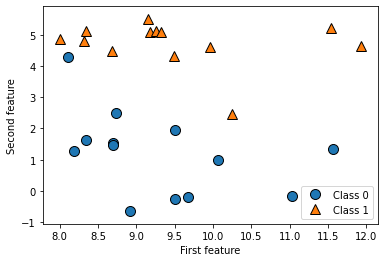

In [2]:
# Dataset para Classificação
# gerando o dataset
X_class, y_class = mglearn.datasets.make_forge()

# scatterplot do dataset
mglearn.discrete_scatter(X_class[:, 0], X_class[:, 1], y_class)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X_class.shape))

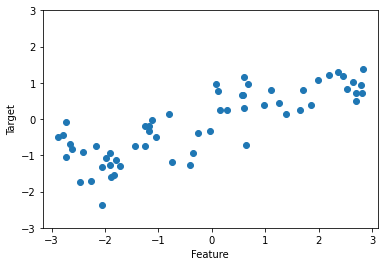

In [3]:
# Dataset para Regressão
# gerando o dataset
X_reg, y_reg = mglearn.datasets.make_wave(n_samples=60)

# plotando
plt.plot(X_reg, y_reg, 'o');
plt.ylim(-3, 3)
plt.xlabel("Feature");
plt.ylabel("Target");

Além desses datasets sintéticos, usaremos outros dois datasets do *scikit-learn*:
* Wisconsin Breast Cancer dataset (pra classificação)
* Boston Housing dataset (para regressão)

In [4]:
# Iniciando o cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(f"Dataset type: {type(cancer['data'])}")
print(f"Dataset shape: {cancer['data'].shape}")
print(f"Dataset target names: {cancer['target_names']}")

Dataset type: <class 'numpy.ndarray'>
Dataset shape: (569, 30)
Dataset target names: ['malignant' 'benign']


Agora, importando o dataset Boston Housing Prices.

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Dataset shape: {boston.data.shape}")

Dataset shape: (506, 13)


In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
print(f"Dataset type: {type(boston['data'])}")

Dataset type: <class 'numpy.ndarray'>


# Conhecendo os Algoritmos

### k-Nearest Neighbors

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


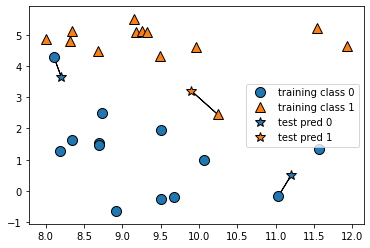

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

O k-NN é um dos algoritmos de classificação mais simples. Ele faz previsões sobre um novo data point procurando por 'k' pontos próximos no dataset de treino. 

Quando k > 1, a classificação é decidida pela quantidade de vizinhos de cada classe.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


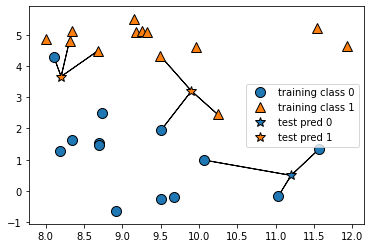

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Utilizando o kNN no *scikit-learn*:

In [12]:
# Separando o dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, random_state=0)

In [13]:
# Inicializando o modelo
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
# Treinando o kNN
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Fazendo a previsão e avaliando o modelo
y_pred = knn_clf.predict(X_test)

print(f"Score do modelo no subset de test: {np.mean(y_pred == y_test)}")

Score do modelo no subset de test: 0.8571428571428571


Utilizando k=3, o algoritmo obteve acurácia de 85,7%. Para entender de forma mais visual o que alterações no parâmetro 'k' fazem com o algoritmo de classificação, vou plotar o código do livro que demonstra: 

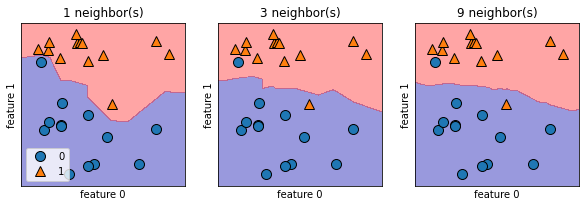

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_class, y_class)
    mglearn.plots.plot_2d_separator(clf, X_class, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_class[:, 0], X_class[:, 1], y_class, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


Modelos com um valor menor de 'k' são mais complexos e mais propensos à sofrer **overfitting**. Já modelos com valores maiores de 'k' tendem a ser mais simples e mais generalizáveis (podendo sofrer de **underfitting**).

O modelo mais simples possível é aquele que **k = n**, com n sendo o número de elementos do dataset. Nesse caso, todos os data points teriam os exatos mesmos neighbors e **todas as previsões seriam idênticas: a classe mais comum no dataset**.

Vamos aplicar esse modelo em um dataset mais complexo, como o de câncer de mama de Wisconsin.

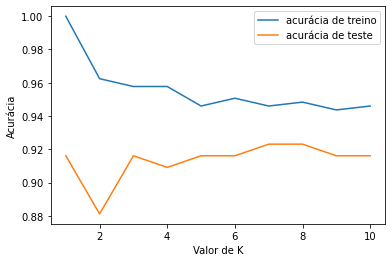

In [17]:
# Splitando o dataset e usando o stratify devido ao desbalanceamento das classes
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []

# testando k entre valores de 1 - 10
k_values = range(1, 11)

for k in k_values:
# Instanciando e fittando o modelo
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
# Salvando a acurácia de treino
    training_accuracy.append(clf.score(X_train, y_train))
    
# Salvando a acurácia de teste
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k_values, training_accuracy, label="acurácia de treino")
plt.plot(k_values, test_accuracy, label="acurácia de teste")
plt.ylabel("Acurácia")
plt.xlabel("Valor de K")
plt.legend()


Aqui fica claro que quando consideramos k = 1, a acurácia de treino é próxima de perfeita, mas a acurácia de teste decai muito (típico comportamento de **overfitting**).

Ao aumentarmos o valor de k, o modelo se torna mais simples e a acurácia de treino decai significativamente. 

Os **dois principais parâmetros** do kNN são o valor de **k** e a **forma que a distância entre os datapoints é medida**. Por padrão, a forma utilizada é a Euclidiana, que funciona bem na maioria dos casos. Já o valor de k deve ser ajustado de acordo com o problema.

Enquanto o algoritmo por trás de modelos kNN é simples de entender (o que facilita no ajuste dos parâmetros), ele não funciona muito bem com datasets com grande número de features e se dá **muito mal** com datasets com diversas observações com valor de 0 (como datasets majoritariamente categóricos em que foi aplicado hot encoding). Além disso, ele acaba sendo lento em datasets grandes e é mais utilizado como modelo baseline.

## Algoritmos Lineares para Regressão

### Linear Regression

Modelos lineares são usados há decadas e tem suas raízes há séculos atrás. Em primeiro momento, vamos estudar sobre os modelos de **Regressão Linear**.
<br>A fórmula básica de um modelo linear é essa:

*ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b*
<br>Com w sendo o peso de cada feature.

w[0]: 0.393906  b: -0.031804


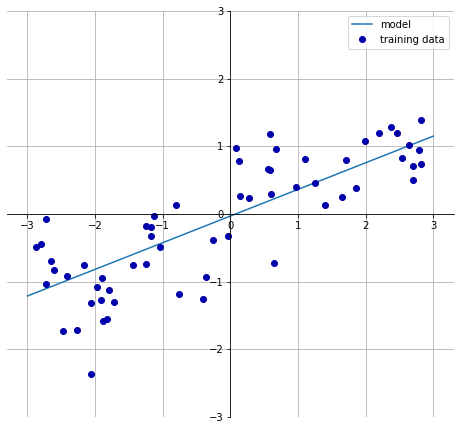

In [18]:
mglearn.plots.plot_linear_regression_wave()

Em modelos simples, de apenas uma feature, a regressão linear é apenas a função de uma linha. Em modelos mais complexos, de 3 ou mais features, ela se torna a função de um hiperplano.
<br>

O modelo linear mais comum para problemas de regressão é o **OLS** (ordinary least squares), que também é chamado de **Linear Regression**. Ele procura por parâmetros **w** e **b** que **minimizam o erro** quadrático médio (*mean squared error*) entre o **y previsto e o valor verdadeiro de y**. 
<br>


In [19]:
# Importando o modelo da Scikit Learn
from sklearn.linear_model import LinearRegression

# Splitando e treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, random_state=42)
lr_model = LinearRegression().fit(X_train, y_train)

Os parâmetros de inclinação (*slope*, **w**) são chamados de coeficientes ou *weights*. Já o parâmetro de interceptação (**b**) é o offset.

In [20]:
print(f"Coeficiente de LR: {lr_model.coef_}")
print(f"Intercept de LR: {lr_model.intercept_}")

Coeficiente de LR: [0.39390555]
Intercept de LR: -0.031804343026759746


In [21]:
## Podemos ver a acurácia da mesma forma que no kNN
print(f"Training set score: {lr_model.score(X_train, y_train)}")
print(f"Test set score: {lr_model.score(X_test, y_test)}")


Training set score: 0.6700890315075756
Test set score: 0.65933685968637


Como os valores estão baixos e próximos, provavelmente o model está sofrendo **underfitting**. Em datasets simples como esse, com apenas uma feature, o risco de overfitting é muito baixo.
<br>

Vamos aplicar o modelo de Regressão Linear em um data set mais complexo, com **506 elementos** e **105 features**.

In [22]:
# Importando o dataset
X, y = mglearn.datasets.load_extended_boston()

# Splitando e treinando
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr_model2 = LinearRegression().fit(X_train, y_train)

In [23]:
print(f"Training set score: {lr_model2.score(X_train, y_train)}")
print(f"Test set score: {lr_model2.score(X_test, y_test)}")

Training set score: 0.952051960903273
Test set score: 0.6074721959665708


Por ser um modelo mais complexo e pelos resultados dos scores (score de treino >> score de teste), podemos afirmar que é um caso de **overfitting**.
<br>
Para resolver isso, devemos procurar um modelo que permita controlar a complexidade. 

### Ridge Regression

Basicamente, modelos de **Ridge Regression** são parecidos com os de Linear Regression na forma que são calculados (OLS). A principal diferença é que eles permitem **regularização** para evitar o overfitting. 
<br>
Os coeficientes (*weights*) são escolhidos não apenas para fitar o modelo certinho, mas também em um limite. Dessa forma, os coeficientes ficam próximos de zero. Os modelos de ridge regression utilizam uma forma de regularização chamada **L2**. 

In [24]:
# Importando o dataset
from sklearn.linear_model import Ridge

# Treinando o modelo
ridge_model = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge_model.score(X_train, y_train)}")
print(f"Test set score: {ridge_model.score(X_test, y_test)}")

Training set score: 0.885796658517094
Test set score: 0.7527683481744755


Como esperado, o modelo criado utilizando o algoritmo Ridge é mais generalizável, perfomando pior no training set e melhor no test set.
<br>

O modelo Ridge faz uma troca entre a **simplicidade do modelo** e a sua **perfomance** no set de **treino** (quanto mais simples - generalizável - pior a perfomance no set de treino). 

Essa troca é parâmetrizada por `alpha`, ao instaciar o modelo. Por padrão, o valor dele é igual a 1. Aumentar o valor de alpha faz com que os coefiecientes se aproximem ainda mais de zero, aumentando a generalização.

In [25]:
ridge_model_10 = Ridge(alpha=10).fit(X_train, y_train)

print(f"Training set score: {ridge_model_10.score(X_train, y_train)}")
print(f"Test set score: {ridge_model_10.score(X_test, y_test)}")

Training set score: 0.7882787115369614
Test set score: 0.635941148917731


Já reduzir o valor de alpha faz com que os coeficientes fiquem menos restritos. Um valor de alpha próximo de zero transforma o modelo em um que parece o Linear Regression.

In [26]:
ridge_model_small = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"Training set score: {ridge_model_small.score(X_train, y_train)}")
print(f"Test set score: {ridge_model_small.score(X_test, y_test)}")

Training set score: 0.9282273685001985
Test set score: 0.772206793647982


In [27]:
ridge_model_Rsmall = Ridge(alpha=0.00001).fit(X_train, y_train)

print(f"Training set score: {ridge_model_Rsmall.score(X_train, y_train)}")
print(f"Test set score: {ridge_model_Rsmall.score(X_test, y_test)}")

Training set score: 0.9515503884016698
Test set score: 0.616198074484263


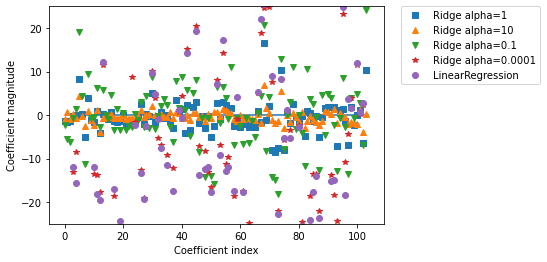

In [28]:
plt.plot(ridge_model.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_model_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge_model_small.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge_model_Rsmall.coef_, '*', label="Ridge alpha=0.0001")
plt.plot(lr_model2.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr_model2.coef_))
plt.ylim(-25, 25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


### Lasso Regression

O algoritmo de regressão **Lasso** funciona de forma similar ao Ridge, mas impõe o limite dos coefientes de forma diferente (chamada de **L1**, diferente do L2 do Ridge). Essa limitação permite que o algoritmo zere alguns coefiecientes que ele não considere importantes para o modelo.
<br>
Assim como o Ridge, o Lasso também oferece a oportunidade de parâmetrização do alpha de uma forma similar. 

Para reduzir chances de underfitting, utilizamos um alpha menor. Caso usar um alpha mínimo, o algoritmo se torna próximo de um Linear Regression.

In [29]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train)}")
print(f"Test set score: {lasso001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.8962226511086497
Test set score: 0.7656571174549983
Number of features used: 33


## Algortimos Lineares para Classificação

Em modelos lineares de classificação, a linha/hiperplano criado gerado pelo modelo é um limite de decisão que separa duas ou mais classificações. A fórmula por trás da função é extremamente similar:
<br>
*ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0*
<br>

Os dois algoritmos mais comuns de classificação linear são:
* Logistic Regression
* Linear Support Vector Machines
<br>

Para entender melhor como esses modelos funcionam, vamos aplicá-los no dataset forge, que geramos no ínicio desse notebook:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


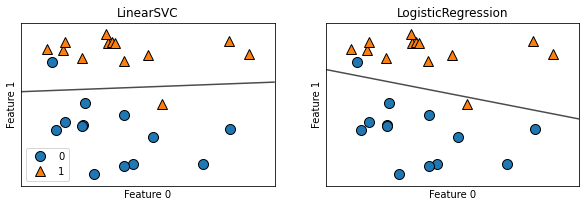

In [30]:
# Importando os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    model_clf = model.fit(X_class, y_class)
    mglearn.plots.plot_2d_separator(model_clf, X_class, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X_class[:, 0], X_class[:, 1], y_class, ax=ax)
    ax.set_title("{}".format(model_clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Como são datasets de apenas duas features, o modelo gerado é um plano que separa as classificações. Data points que tiverem acima da linha serão classificados como 1 e abaixo como 0.
<br>

Ambos os modelos utlizam regularização do tipo **L2**, assim como o Ridge. No entanto, diferente do Ridge, a parametrização é dada pelo valor de `C`, que funciona de forma inversa ao alpha. 
<br>

**Altos valores de C** correspondem a uma **menor regularização** e um aumento na tendência de **overfitting**.

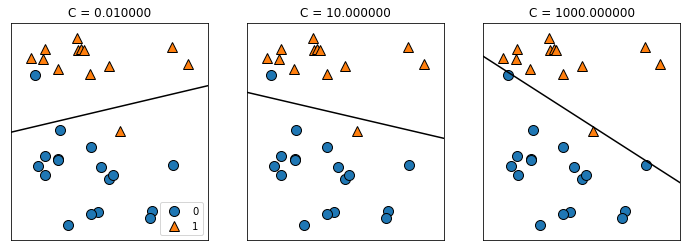

In [31]:
# Plot criado pelo autor do livro para demonstrar as diferenças no valor de C
mglearn.plots.plot_linear_svc_regularization()

Quanto maior o valor de C, mais o algoritmo tenta levar em consideração cada ponto do data set de treino e mais se inclina para separar perfeitamente os pontos. 
<br>

Se o objetivo do algorito é generalizar para novos casos, um alto valor de C dificultará essa tarefa. Vamos aplicar o algoritmo de **Logistic Regression** no dataset de **câncer de mama** e verificar a diferença que mudanças no valor de C causam no score:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg_model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print(f"Training set score: {logreg_model.score(X_train, y_train)}")
print(f"Test set score: {logreg_model.score(X_test, y_test)}")

Training set score: 0.9577464788732394
Test set score: 0.958041958041958


In [33]:
logreg_model100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)

print(f"Training set score: {logreg_model100.score(X_train, y_train)}")
print(f"Test set score: {logreg_model100.score(X_test, y_test)}")

Training set score: 0.9835680751173709
Test set score: 0.965034965034965


In [34]:
logreg_model001 = LogisticRegression(max_iter=10000, C=0.00001).fit(X_train, y_train)

print(f"Training set score: {logreg_model001.score(X_train, y_train)}")
print(f"Test set score: {logreg_model001.score(X_test, y_test)}")

Training set score: 0.92018779342723
Test set score: 0.916083916083916


### Modelos Lineares para Classificação Multiclasse

A maioria dos modelos de classificação linear não oferecem suporte nativo para multiclassificação (com exceção de Logistic Regression). Para resolver isso, é usado uma aproximação *one-vs.-rest* ao problema.
<br>

Nessa forma de aproximação, são criados modelos de classificação binária pra cada uma das classes. A previsão é feita de acordo com o score que o data point obteve em cada um dos modelos. 

Para demonstrar como funciona, vamos importar um dataset novo, criado pelos autores do livro:

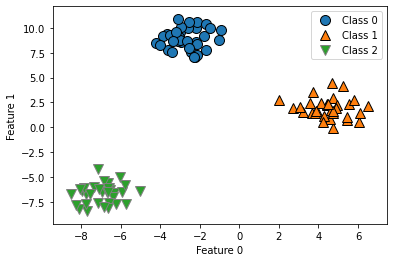

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [36]:
# Agora, vamos treinar um modelo de SVM
linear_svm = LinearSVC().fit(X, y)

print(f"Coefficient shape: {linear_svm.coef_.shape}")
print(f"Intercept shape: {linear_svm.intercept_.shape}")

Coefficient shape: (3, 2)
Intercept shape: (3,)


Tanto o coeficiente quanto o intercept possuem 3 linhas, cada uma pra cada classe.

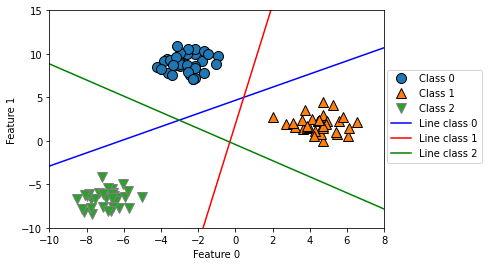

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

Nesse plot contido no livro, dá pra ver claramente cada a linha gerada por cada um dos modelos, separando uma classe do "resto". 

Text(0, 0.5, 'Feature 1')

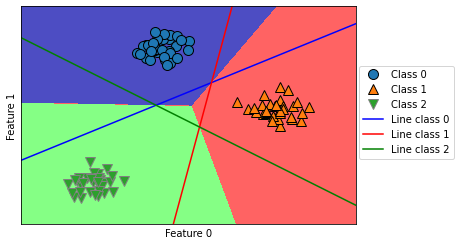

In [38]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

O principal parâmetro de todos os modelos lineares é o **parâmetro de regularização**. Ele é chamado de `alpha` em modelos de regressão e `C` no LinearSVC e no Logistic Regression.
<BR>
    
Valores grandes em `alpha` e pequenos em `C` significam modelos mais simples e mais regularizados. Ajustar esses parâmetros é be importante, principalmente em modelos de regressão. Geralmente, esses valores são procurados em **escala logaritmica**.
<br>

Outro parâmetro que deve ser escolhido é o tipo de regularização. Caso assumir que apenas alguns parâmetros são importantes, é interessante utilizar o **L1**. Caso o contrário, o **parâmetro padrão L2** é o mais utilizado.
<br>
    
Modelos lineares são **rápidos pra treinar e prever**. Dependendo do tamanho do dataset, é válido olhar a documentação do `Skcit-Learn` para procurar pelo `solver` mais adequado. 

### Naive Bayes Classifiers

Classificadores Naive Bayers são **similares aos modelos lineares**, porém tendem a ser ainda **mais rápidos** na hora de **treinar**. Por serem mais eficientes nesse sentido, acabam sendo **piores** para **generalizar em sets de teste**.
<br>

Eles funcionam aprendendo parâmetros olhando para cada feature individualmente e coletando estatísticas simples per-class de cada uma. Na lib *scikit-learn*, existem 3 classificadores Naive Bayers:
* GaussianNB
* BernoulliNB
* MultiomialNB

**GaussianNB** pode ser usado em dados contínuos, enquanto o **BernoulliNB** assume que os dados são binários. Por último, o **MultinomialNB** assume dados de algum tipo de contador (cada feature é um `integer` representando a conta de alguma coisa - i.e. quantas vezes uma palavra aparece numa frase). Os últimos dois algoritmos são bem usados em classificações de texto.
<br>

**BernoulliNB** conta quantas vezes cada feature de cada classe tem valor não-zero. Já o **GaussianNB**, por receber dados contínuos, utiliza a **média** e o **desvio padrão** de cada feature de cada uma das classes. O **MultinomialNB** funciona de uma forma parecida, porém sem contabilizar o desvio padrão.
<br>
Para fazer uma previsão, o novo data point é comparado com as estatísticas de cada uma das classes, e a que a classe que bater mais com o novo data point é aquela que é prevista.
<br>

O **MultinomialNB** e o **BernoulliNB** tem apenas um parâmetro: `alpha`, que controla a complexidade do modelo. Quanto maior o valor de alpha, menor a complexidade de modelo. 
<br>
Ainda assim, a performace desses modelos é relativamente robusta ao valor de `alpha`. Ele faz diferença na acurácia dos modelos, mas não é crítico para a perfomance dos mesmos.

### Decision Trees

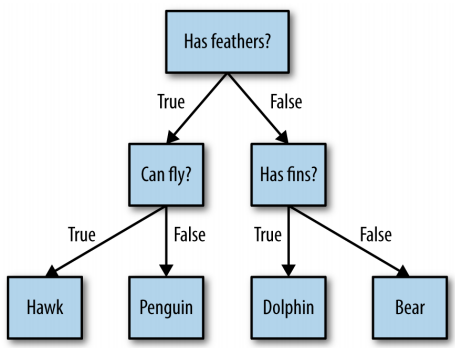

**Decision Trees** utilizam Machine Learning para aprender sequências de perguntas if/else que levam a uma classificação ou a um resultado de regressão o mais rápido possível.

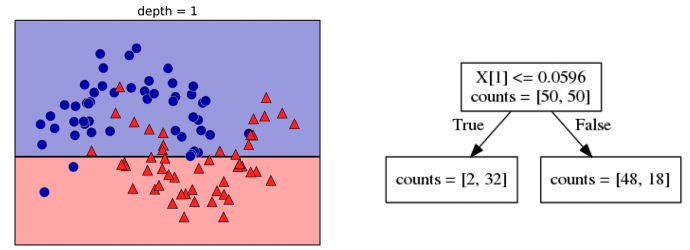

Inicialmente, o algoritmo procura todos os `tests` (como são chamados cada "pergunta" dentro do algoritmo) possíveis e seleciona aquele que é mais infomativo sobre a variável-alvo.

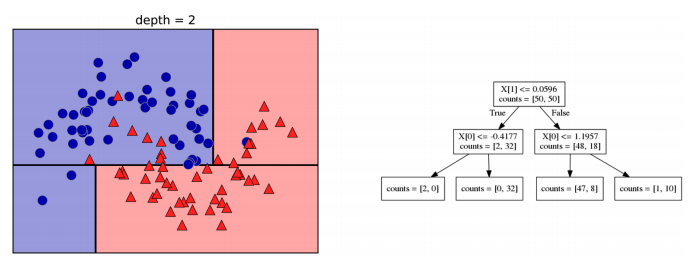
O próximo passo, após o primeiro `test`, é procurar novos `tests` para cada possibilidade de resposta do primeiro, separando de forma ainda mais "correta".
<br>

Esse algoritmo possui um comportamento recursivo e é bem propenso à **overfitting** caso não tenha sua *depth* limitada. Abaixo, uma árvore de decisão com depth = 9.

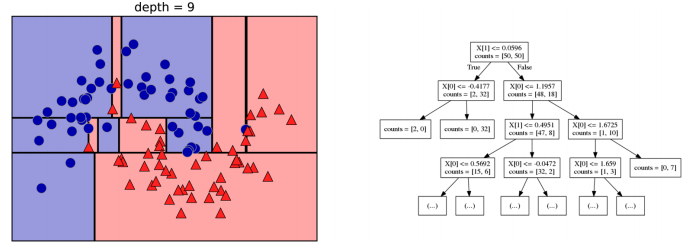

Caso o parâmetro `depth` não for limitado, definimos os nodes finais como *pure leaves*. Na existência deles, a acurácia no treino é sempre **100%**.
<br>
Além de limitar a `depth`, existem outras formas de prevenir o overfitting:
* **Pre-prunning**: limitar o número de folhas, pedir um valor mínimo de data points para a criação de uma nova folha. Aqui entra também a limitação do parâmetro `depth`.
* **Post-prunning**: remover ou colapsar os nodes que possuem pouca informação.
<br>

Vamos aplicar o algoritmo **Decision Tree** em modo de classificação no dataset de câncer de mama.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


Como não especificamos a `depth`, obtivemos acurácia de 100% no set de treino (como não houve prunning, as *leaves* são puras e a árvore cresceu fundo o suficiente pra memorizar todas as labels do set de treino).

Apesar da acurácia no set de teste ser relativamente alta, ainda foi abaixo dos nossos modelos lineares devido à baixa generalização do modelo criado. Limitar o depth da árvore diminui a acurácia no set de treino, mas aumenta no set de teste:

In [41]:
# Com depth = 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train)}")
print(f"Accuracy on test set: {tree.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


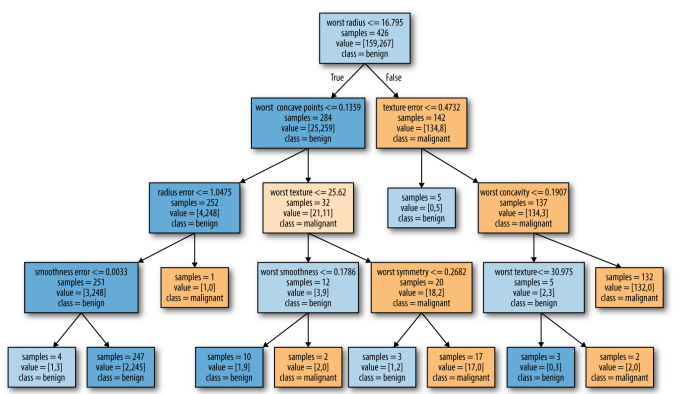

Para identificar as features com maior importância, podemos usar a propriedade `.feature_importances` do modelo e plotar utilizando matplotlib:

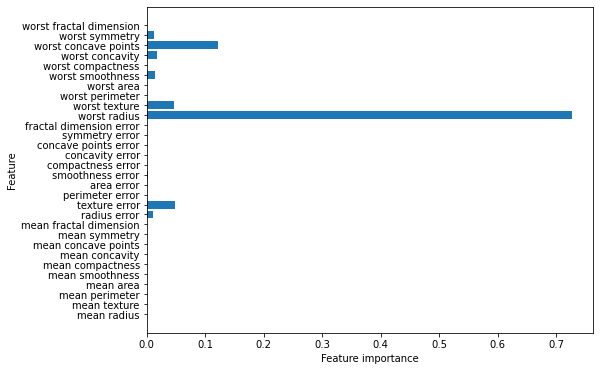

In [42]:
def plot_feature_importances_cancer(model):
     ax, fig = plt.subplots(figsize=(8,6))
     n_features = cancer.data.shape[1]
     plt.barh(range(n_features), model.feature_importances_, align='center')
     plt.yticks(np.arange(n_features), cancer.feature_names)
     plt.xlabel("Feature importance")
     plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Com o plot, fica clara a importância da feature *worst radius* para a decisão do tipo de câncer nesse modelo. 
Ainda assim, **a falta de importância numa feature não significa que ela não dê nenhuma informação** para o problema/modelo. Só significa que ela **não foi escolhida** pelo algoritmo **primeiro** e alguma outra feature classificava de forma parecida.
<br>

Diferente dos coeficientes nos modelos lineares, a importância de uma feature em um modelo de tree decision não pode ser negativa. O gráfico não mostra se a feature 'worst concave points' com um valor alto seria indicativo de câncer maligno ou benigno.

Por mais que o que estudamos até aqui focasse mais especificamente me classificadores, tudo também pode ser aplicado pra **decision trees para regressão**. 
<br>

Existe uma particularidade que vale para todos os modelos de regressão baseados no algoritmo de decision tree, no entanto: **ele não é capaz de *extrapolar***, ou fazer previsões fora do alcance do set de treino.

Para demonstrar isso, usaremos um dataset com o preço do Mb de RAM ao longo dos anos:

In [43]:
url = "https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv"

ram_prices = pd.read_csv(url)

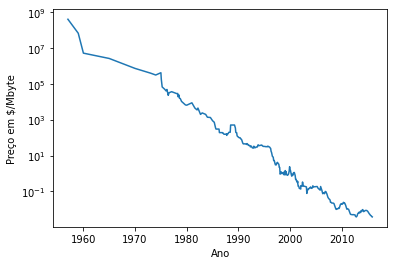

In [44]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Ano");
plt.ylabel("Preço em $/Mbyte");

In [45]:
from sklearn.tree import DecisionTreeRegressor

# usar dados históricos pra prever o preço a partir dos anos 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# prever dados baseado na data
X_train = data_train.date[:, np.newaxis]
# transformada logaritmica pra ter uma relação mais simples 
# entre os dados e o target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# prever o dataset inteiro
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# desfazer a transformada logaritmica
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-45-adc2c9f4e776>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-45-adc2c9f4e776>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


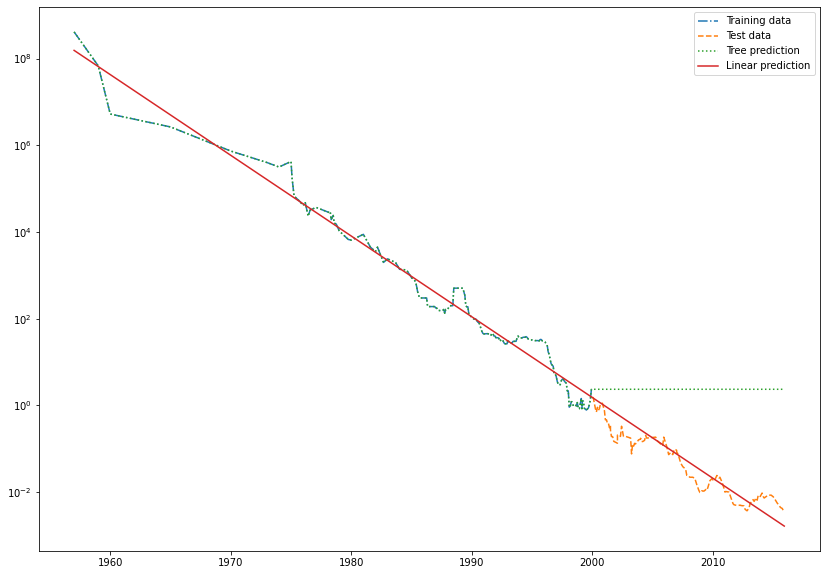

In [46]:
ax, fig = plt.subplots(figsize=(14,10))
plt.semilogy(data_train.date, data_train.price, label="Training data", linestyle="dashdot")
plt.semilogy(data_test.date, data_test.price, label="Test data", linestyle="dashed")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction", linestyle="dotted")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();

Enquanto o modelo linear prevê utilizando uma linha, o modelo tree-decision prevê perfetamente set de treino, mas não consegue gerar respostas novas quando os dados acabam.

Os **principais parâmetros** de decision trees são aqueles que controlam a complexidade do modelo. Normalemnte, pra **previnir overfitting** é só utilizar alguma das estratégias de **pre-prunning**: `max_depth`, `max_leaf_nodes` ou `min_samples_leaf`. Utilizar apenas um já é suficiente.
<br>

As decision trees têm **duas vantagens** sobre os modelos que estudamos até agora nesse notebook:
* O resultado do modelo pode ser visualizado e entendido por leigos (em árvores curtas)
* É completamente invariante sobre a forma do escalamento dos dados. Como cada feature é processada separadamente, não tem necessidade de normalização ou standardização das features. 

O problema do algoritmo é que ele tende à **overfit** e tem performace de generalização meio ruim.
<br>

Vamos ver agora **métodos que combinam múltiplas decision trees** para gerar modelos que resolver o problema do algoritmo.

### Random Forests

Random Forests são uma coleção de decision trees em que cada tree é levemente diferente da outra. A ideia por trás é que cada árvore é relativamente boa em prevêr, mas acaba sofrendo overfitting em algum momento.

Usando a **média das árvores** que dão **overfitting em lugares diferentes** geramos um modelo que reduz o overfit e retém o poder preditivo da árvores.

Para construir um modelo **random forest**, deve-ser definido o parâmeto `n_estimators` (número de árvores da floresta). Cada uma dessas árvores vai ser construida de maneira **independente da outra** e o algoritmo vai fazer **escolhas aleatórias** em cada uma das árvores para garantir a diferença entre elas.
<br>

Para construir uma árvore, devemos usar uma *bootstrap sample* (um dataset com o mesmo tamanho do dataset original, mas com data points faltando e outros repetidos. O número de data points trocados é defindo pelo parâmetro `n_samples`).
<br>

A decision tree criada utiliza apenas algumas features (definidas pelo parâmetro `max_features`) do dataset pra gerar o modelo. Caso seja definido um número alto de features por árvore, elas vão ser similares. O contrário é válido. 

A **previsão da random forest** é dada fazendo uma previsão em cada árvore da floresta. Em um modelo de regressão, o resultado é a média das previsões. Já para classificação, é utilizado uma estratégia de "soft voting", dando uma probabilidade pra cada uma das classes.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

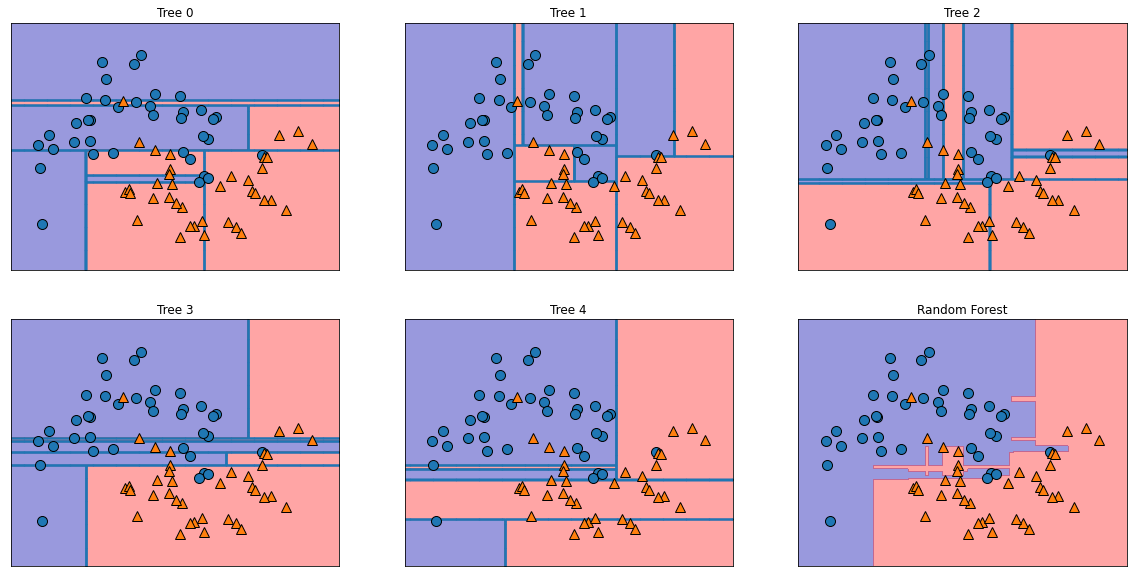

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
     ax.set_title("Tree {}".format(i))
     mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                 alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Dá pra ver que cada árvore da Random Forest faz uma previsão final bem diferente e que o modelo final médio é bem melhor.
<br>

Agora, vamos aplicar uma Random Forest de 100 árvores no dataset com dados de Câncer de Mama:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
                                 cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f"Accuracy on training set: {forest.score(X_train, y_train)}")
print(f"Accuracy on test set: {forest.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


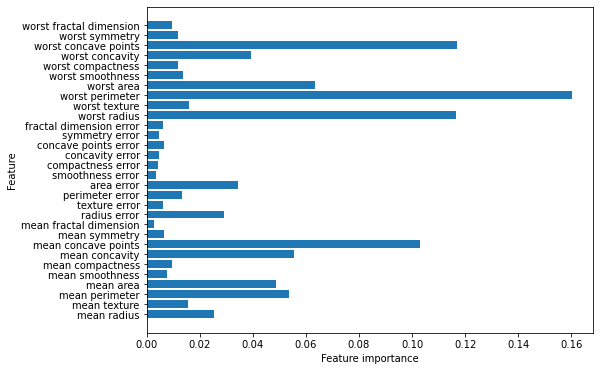

In [50]:
plot_feature_importances_cancer(forest)

A **random forest** obteve acurácia melhor em ambos os testes que os modelos lineares ou de apenas uma decision tree, sem tunar nenhum parâmetro.
Podíamos ajustar aqueles ditos acima, mas em random forests os parâmetros padrão geralmente funcionam bem.
<br>

Outra vantagem da random forest é que sua feature_importance é bem mais detalhada, pois a randomização na escolha das features obriga a árvore a considerar mais explicações.

Suas desvantagens estão na complexidade da explicação do modelo. Ele acaba sendo quase que um *black box*. Além disso, não funcionam muito bem em textos (nesse caso, o melhor é utilizar modelos lineares) e requerem bastante poder computacional (pode ser definido o número de cores do CPU utilizados com o parâmetro `n_jobs` para o treinamento ser paralelizado).
<br>

Por serem pesados, os algoritmos de Random Forest **requerem mais memória e tempo** para treinar e fazer previsões. 

### Gradient Boosted Regression Trees (Gradient Boosting Machines)

Uma rápida olhada no [Kaggle](https://www.kaggle.com/) e já observamos diversos modelos que utilizam esse algoritmo que, apesar do nome, pode ser usado pra classificação também. 
<br>

O funcionamento por trás de **gradient boosting** é combinar diversos modelos simples (nesse contexto são chamados de *weak learners* ), como árvores de `depth = 1 ~ 5`. Cada árvore só vai conseguir oferecer boas previsões pra um pequeno pedaço dos dados e aí mais árvores são adicionadas pra aumentar a performance do modelo iterativamente. 
<br>
Ao invés de serem criadas aleatóriamente, como é o caso do **random forest**, Gradient Boostinng Machines criam árvores em série, com uma tentando corrigir o erro da última criada. Além da forte parametrização no sentido de *pre-prunning* (para a criação de weak learners), o algoritmo também faz uso de um importante parâmetro chamado *learning rate*, que controla o quão forte a árvore tenta corrigir o erro da última.
<br>

Um `learning_rate`/`n_estimators`(número de árvores) alto gera um modelo mais complexo, pois tem maior chance de corrigir os erros no set de treino. No entanto, isso pode acabar **overfittando** o modelo. 
<br>

O algoritmo é bem mais sensível a mudanças nos parâmetros que o Random Forest. Vamos testar isso utilizando parâmetros padrão e depois modificando-os:

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


Como a acurácia no set de treino é igual a 1, provavelmente o modelo está sofrendo overfit. Vamos aplicar parâmetros de *pre-prunning*, limitando o `max_depth` da árvore ou diminuindo a `learning_rate`:

In [52]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test)}")

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


In [53]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f"Accuracy on training set: {gbrt.score(X_train, y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test, y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.965034965034965


Foi obtido um melhor resultado ao limitar o parâmetro `max_depth`. Por padrão, o Gradient Boost Classifier cria **100 árvores**, o que impossibilita a inspeção de cada uma delas. Mas ele também conta com a propriedade de `.feature_importance`:

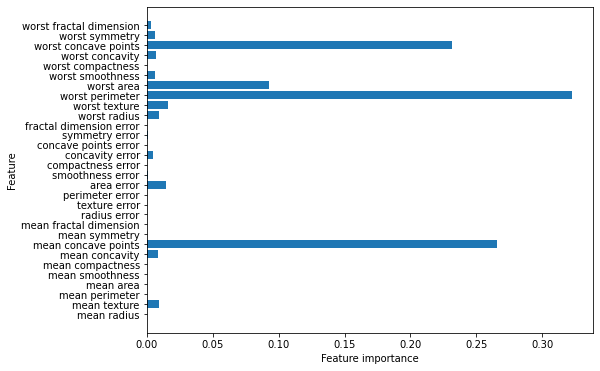

In [54]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Como ambos Gradient Boost e Random Forest funcionam bem nos mesmos tipos de dataset, geralmente o Random Forest é utilizando primeiramente por ser mais robusto (sem ter necessidade de parametrização). Caso tenha necessidade de mais acurácia, utilizar o Gradient Boosting geralmente ajuda. 
<br>

Para esse último, vale dar uma olhada na lib `xgboost`, que é especifica para esse tipo de modelo, sendo mais rápida e normalmente mais fácil de parametrizar. 
<br>

**Parâmetros Importantes**
* `learning_rate` e `n_estimators`: esses parâmetros são interconectados, uma vez que com uma taxa de aprendizagem baixa, um maior número de árvores é necessário pra criar um modelo da mesa complexidade.
* `max_depth`: importante deixar entre 1 e 5, geralmente pro lado mais baixo, pra reduzir a complexidade de cada árvore.

## Referência

**An Introduction to Machine Learning with Python** by Andreas C. Müller and Sarah Guido (O’Reilly), cap. 2. Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.